In [1]:
#This is for learning purposes using
#Hands-On Machine Learning with Scikit-Learn, Keras and TensorFlow by Aurélien Géron (O’Reilly).
#Copyright 2019 Aurélien Géron, 978-1-492-03264-9.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

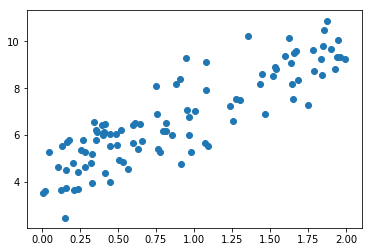

In [2]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)
plt.scatter(X,y)

In [17]:
X_b = np.c_[np.ones((100,1)), X]
X_b.shape[1]

2

In [4]:
# this is the normal equation: θˆ=(X^T*X)^−1*X^T*y
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best
# would hope for θ0 to be 4 and θ1 to be 2 but noise skews... noise is represented as
# Guassian noise (np.random.randn(100, 1))

array([[4.20803515],
       [2.79484483]])

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # slap on 1's
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.20803515],
       [9.79772481]])

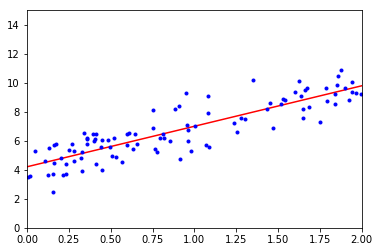

In [6]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
# same result as above, using normal equation

(array([4.20803515]), array([[2.79484483]]))

In [8]:
lin_reg.predict(X_new)

array([[4.20803515],
       [9.79772481]])

In [9]:
# same as the scipy.linalg.lstsq function
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.20803515],
       [2.79484483]])

In [10]:
# pseudo-inverse (Moore-Penrose) uses Singular Value Decomposition (SVD),
# decomposes training set into multiplication of three matricies, computed as
# X^+=VΣ^+U^T where Σ^+ sets zero all values below a threshold, inverts all non-zero values,
# and transposes the matrix... SVD handles edge cases better than normal equation and is faster
np.linalg.pinv(X_b).dot(y)

array([[4.20803515],
       [2.79484483]])

In [18]:
# gradient descent
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iterations in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta  # same results as normal and SVD equations... gradient descent works better with lots of features
# but is slow with lots of data because it computes gradient at every step

array([[4.20803515],
       [2.79484483]])

In [19]:
# stochast gradient descent - pick random instance at every step for gradient, much faster for larger data sets
# but bounces around, good but not optimal result
# if cost function irregular, random choice has better chance of finding global minimum than Batch
# solution to problem of never settling at optimum is to gradually reduce learning rate;
# start large to escape any local minimum, then get smaller and smaller
# Code note included...

In [20]:
# Polynomial regression
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

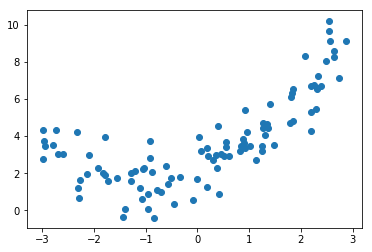

In [23]:
plt.scatter(X, y)

In [25]:
# use PolynomialFeatures of scikit-learn to transform data
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([1.34115401]), array([1.34115401, 1.79869407]))

In [26]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.12525993]), array([[1.01141662, 0.49940438]]))

In [36]:
X.shape

(100, 1)